## Exploring Relationships

### 1. Correlations

### 2. Scatterplots

### 3. Pair Plots

### 4. Categorical Plots

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os
import warnings

In [2]:
warnings.filterwarnings('ignore')

In [3]:
# Identify path
path = r'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'
path

'/Users/abrockk12.wv.us/Documents/Career Foundry/Brazilian E_Commerce'

In [4]:
# Import data 
df = pd.read_pickle(os.path.join(path, 'e_commerce_clean.pkl'))

In [5]:
# Check data
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,lead_type,lead_behaviour_profile,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,nan,nan,nan,NaN,NaN,NaT,nan,nan,campos dos goytacazes,RJ
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,nan,nan,nan,NaN,NaN,NaT,nan,nan,santa fe do sul,SP
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,nan,nan,nan,NaN,NaN,NaT,nan,nan,pará de minas,MG
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,nan,nan,nan,NaN,NaN,NaT,nan,nan,atibaia,SP
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,nan,nan,nan,NaN,NaN,NaT,nan,nan,varzea paulista,SP


In [6]:
df.info

<bound method DataFrame.info of                                 order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
3       000229ec398224ef6ca0657da4fc703e              1   
5       00024acbcdf0a6daa1e931b038114c75              1   
6       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
177468  fffc94f6ce00a00581880bf54a75a037              1   
177470  fffcd46ef2263f404302a634eb57f7eb              1   
177471  fffce4705a9662cd70adb13d4a31832d              1   
177473  fffe18544ffabc95dfada21779c9644f              1   
177474  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
3       c777355d18b72b67a

In [7]:
df.columns

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value', 'review_id',
       'review_score', 'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_length', 'product_description_length',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'seller_zip_code_prefix',
       'seller_city', 'seller_state', 'customer_unique_id', 'zip_code_prefix',
       'customer_city', 'customer_state', 'product_category_name_english',
       'mql_id', 'sdr_id', 'sr_id', 'business_segment', 'lead_type',


In [8]:
df.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetim

In [9]:
# Create subset of dataframe with variables to inspect further
sub = df[['price', 'order_item_id', 'payment_installments', 'freight_value', 'payment_value', 'review_score', 'product_weight_g', 'product_length_cm', 'product_height_cm']]

In [10]:
sub

,price,order_item_id,payment_installments,freight_value,payment_value,review_score,product_weight_g,product_length_cm,product_height_cm
0,58.90,1,2.0,13.29,72.19,5.0,650.0,28.0,9.0
1,239.90,1,3.0,19.93,259.83,4.0,30000.0,50.0,30.0
3,199.00,1,5.0,17.87,216.87,5.0,3050.0,33.0,13.0
5,12.99,1,2.0,12.79,25.78,4.0,200.0,16.0,10.0
6,199.90,1,3.0,18.14,218.04,5.0,3750.0,35.0,40.0
...,...,...,...,...,...,...,...,...,...
177468,299.99,1,1.0,43.41,343.40,5.0,10150.0,89.0,15.0
177470,350.00,1,1.0,36.53,386.53,5.0,8950.0,45.0,26.0
177471,99.90,1,3.0,16.95,116.85,5.0,967.0,21.0,24.0
177473,55.99,1,3.0,8.72,64.71,5.0,100.0,20.0,20.0


In [11]:
sub.corr()

,price,order_item_id,payment_installments,freight_value,payment_value,review_score,product_weight_g,product_length_cm,product_height_cm
price,1.000000,-0.060522,0.282141,0.414204,0.748863,-0.004134,0.340000,0.146123,0.223821
order_item_id,-0.060522,1.000000,0.072938,-0.029380,0.267520,-0.129566,-0.003329,0.005549,0.030068
payment_installments,0.282141,0.072938,1.000000,0.190412,0.264535,-0.044014,0.185266,0.123384,0.124863
freight_value,0.414204,-0.029380,0.190412,1.000000,0.380854,-0.036223,0.611346,0.308105,0.391738
payment_value,0.748863,0.267520,0.264535,0.380854,1.000000,-0.083932,0.313394,0.144340,0.222484
review_score,-0.004134,-0.129566,-0.044014,-0.036223,-0.083932,1.000000,-0.031225,-0.021752,-0.029481
product_weight_g,0.340000,-0.003329,0.185266,0.611346,0.313394,-0.031225,1.000000,0.460079,0.582638
product_length_cm,0.146123,0.005549,0.123384,0.308105,0.144340,-0.021752,0.460079,1.000000,0.190290
product_height_cm,0.223821,0.030068,0.124863,0.391738,0.222484,-0.029481,0.582638,0.190290,1.000000


In [12]:
matplotlib.__version__

'3.7.2'

In [13]:
%matplotlib inline

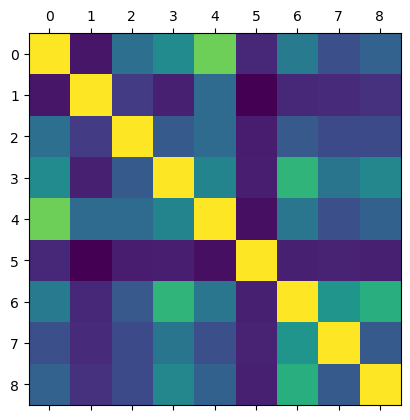

In [14]:
# Heatmap with matplotlib
plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Heatmap Matrix')

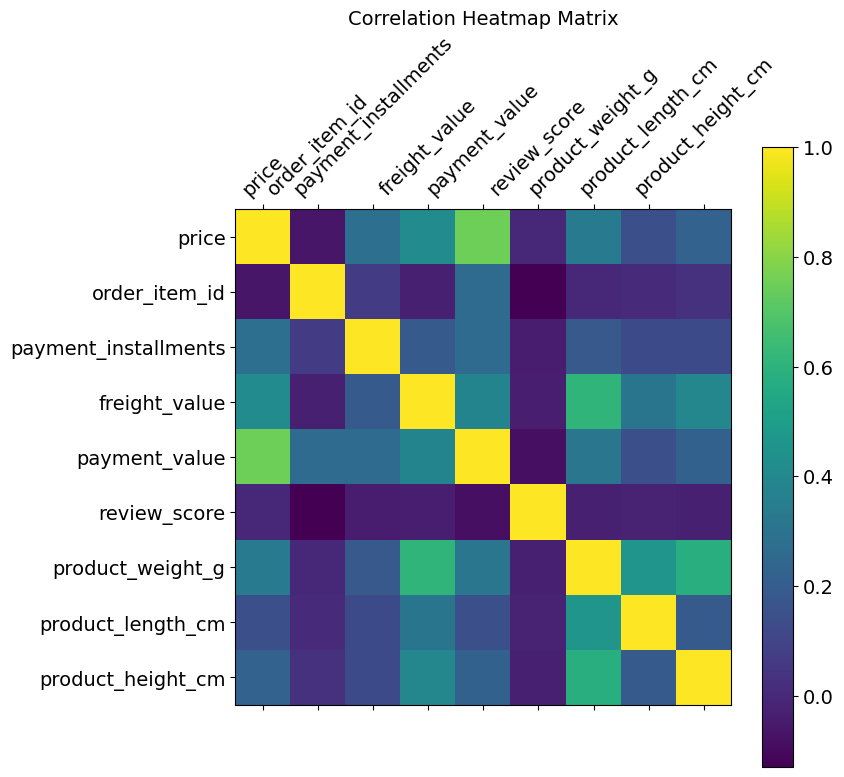

In [15]:
# Customize heatmap

f = plt.figure(figsize= (8,8))
plt.matshow(sub.corr(), fignum = f.number)
plt.xticks(range(sub.shape[1]), sub.columns, fontsize = 14, rotation = 45)
plt.yticks(range(sub.shape[1]), sub.columns, fontsize = 14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize = 14)
plt.title('Correlation Heatmap Matrix', fontsize = 14)

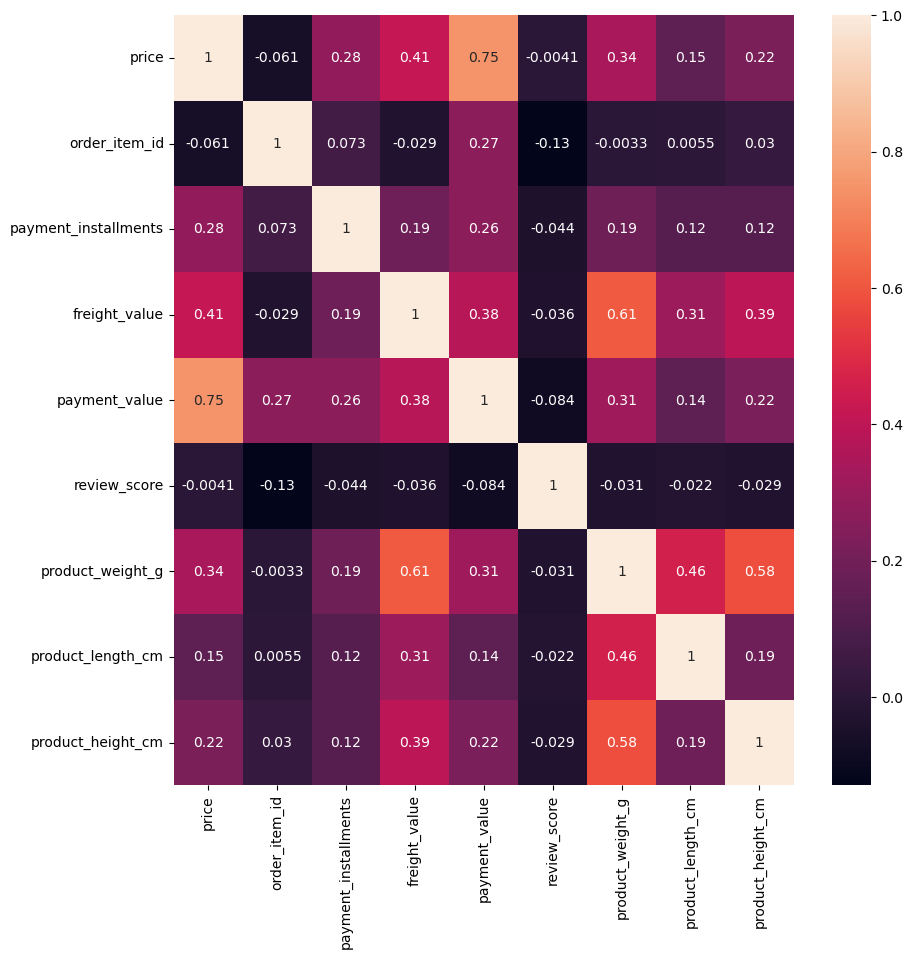

In [16]:
# Heatmap with seaborn
f,ax = plt.subplots(figsize=(10,10))

corr = sns.heatmap(sub.corr(), annot = True, ax = ax)

#### Coefficient Correlations
Comparing the variables with the correlation heatmap can lead to some early insights and drive further questioning. The first relationships that jumps out of the heatmap is payment_value and price. This makes sense being that the higher the price, the higher the payment will be. We can see that price and freight_value have a moderate positive relationship. The higher the price of the item, the more it costs for shipping. This also logically checks out because more expensive items are probably larger and heavier resulting in a higher freight cost. This can be comfirmed by the correlation of the freight_value and the product's height and weight. One thing I thought would have some correlations was the review_score, however review_score has no correlation with any of the other numerical variables. 

### Scatterplots

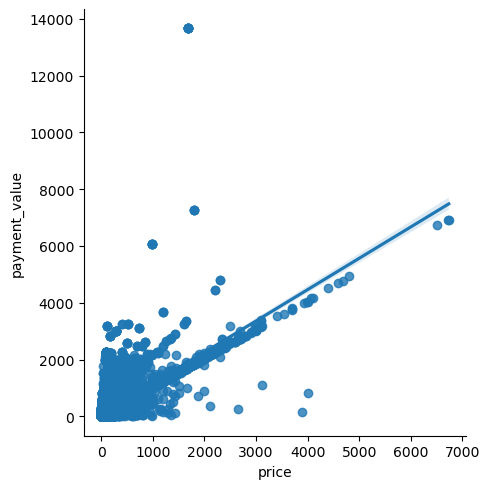

In [17]:
# Create a scatterplot the variables that had the strongest correlation coefficients
sns.lmplot(x = 'price', y = 'payment_value', data = sub)

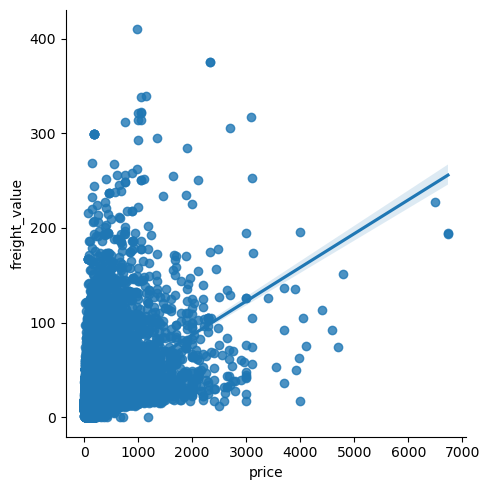

In [18]:
sns.lmplot(x = 'price', y = 'freight_value', data = sub)

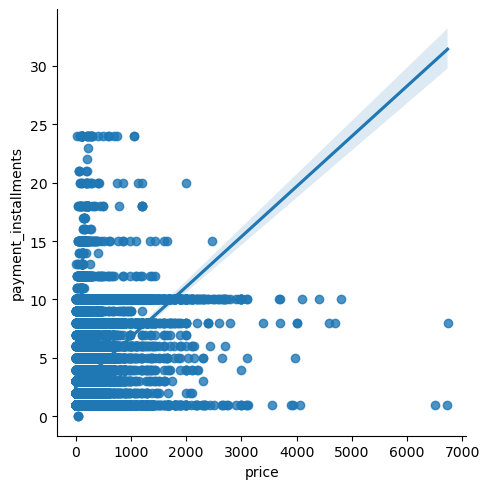

In [19]:
sns.lmplot(x = 'price', y = 'payment_installments', data = sub)

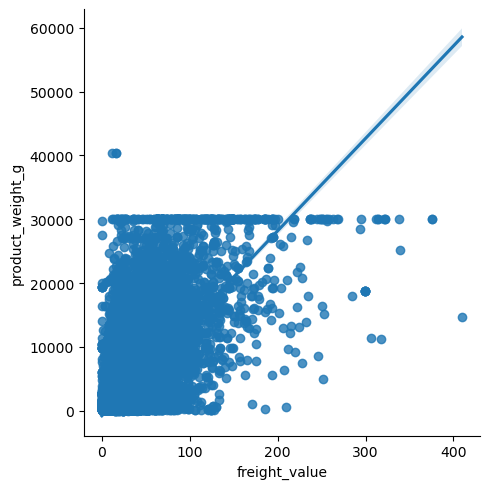

In [20]:
sns.lmplot(x = 'freight_value', y = 'product_weight_g', data = sub)

#### Scatterplot Analysis
Comparing the variables that had the largest correlation coefficients with scatterplots did not result in any significant findings. Most had moderate to weak relationships. I believe I will be able to find more significant insights when comparing categorical data with the price and review variables. 

### Pair Plots

In [21]:
df.dtypes

order_id                                 object
order_item_id                             int64
product_id                               object
seller_id                                object
shipping_limit_date                      object
price                                   float64
freight_value                           float64
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
review_id                                object
review_score                            float64
review_comment_title                     object
review_comment_message                   object
review_creation_date             datetime64[ns]
review_answer_timestamp          datetime64[ns]
customer_id                              object
order_status                             object
order_purchase_timestamp                 object
order_approved_at                datetim

In [22]:
# Getting shipping time for each order
df['shipping_time'] = df['order_delivered_customer_date'] - df['order_approved_at']

In [23]:
df['shipping_time'] = df['shipping_time'] + pd.Timedelta('12h')

In [24]:
# Split days and time in new shipping_time variable
df['shipping_days'] = df['shipping_time'].dt.days

In [25]:
df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,payment_sequential,payment_type,payment_installments,...,business_type,declared_product_catalog_size,declared_monthly_revenue,first_contact_date,landing_page_id,origin,geolocation_city,geolocation_state,shipping_time,shipping_days
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,1.0,credit_card,2.0,...,nan,NaN,NaN,NaT,nan,nan,campos dos goytacazes,RJ,8 days 01:58:13,8.0
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,1.0,credit_card,3.0,...,nan,NaN,NaN,NaT,nan,nan,santa fe do sul,SP,16 days 16:59:11,16.0
3,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,1.0,credit_card,5.0,...,nan,NaN,NaN,NaT,nan,nan,pará de minas,MG,8 days 10:30:46,8.0
5,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,1.0,credit_card,2.0,...,nan,NaN,NaN,NaT,nan,nan,atibaia,SP,6 days 15:22:21,6.0
6,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,1.0,credit_card,3.0,...,nan,NaN,NaN,NaT,nan,nan,varzea paulista,SP,25 days 14:32:18,25.0


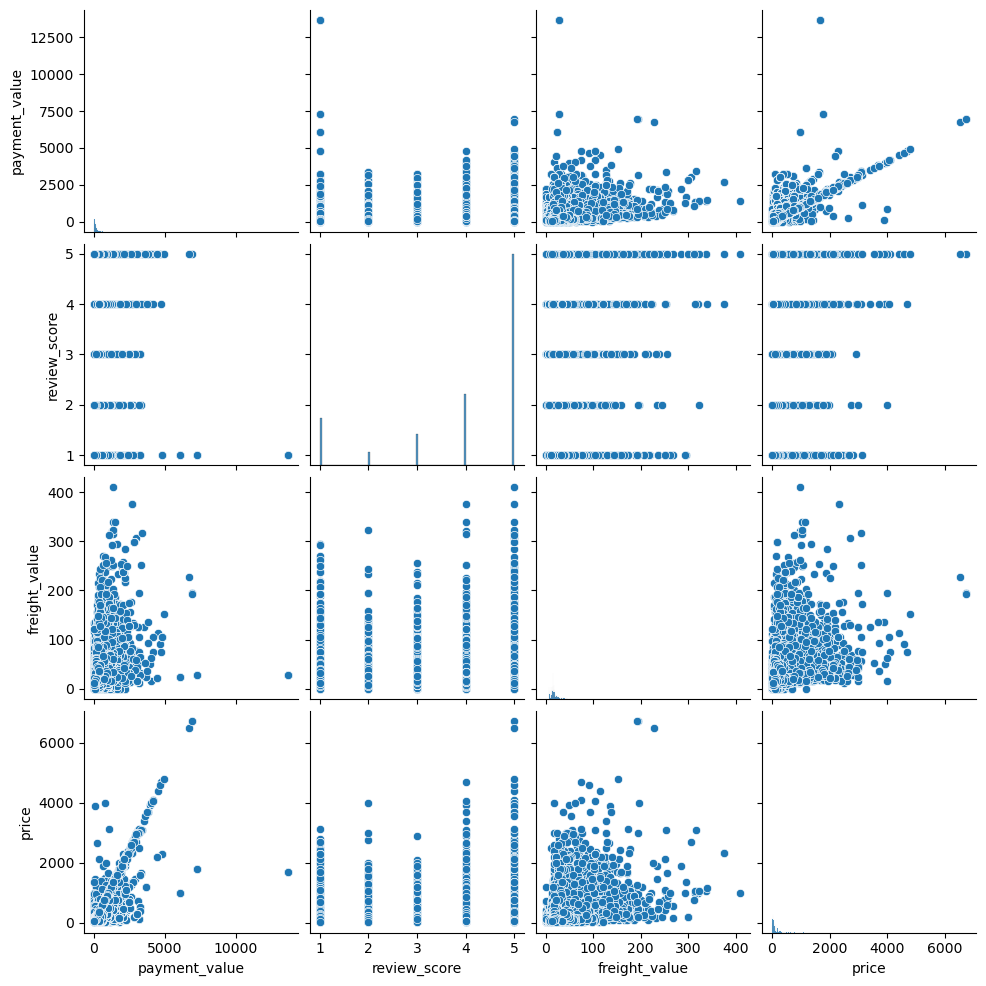

In [26]:
# Use a subset of sub to create a pair plot
sub2 = df[['payment_value', 'review_score', 'freight_value', 'price']]
pair = sns.pairplot(sub2)
pair

#### Pair Plot Analysis
Taking a look at a few of the variables with the highest correlation coefficients, we can see a weak correlation between review_score and payment_value that is increasing. Other than a few outliers that had high payment_values with a low review_score, the higher the payment_value, the higher the review_score.
I would like to create custom variables with the number of orders within each review_score. 

### Categorical Charts

<Axes: xlabel='review_score', ylabel='Count'>

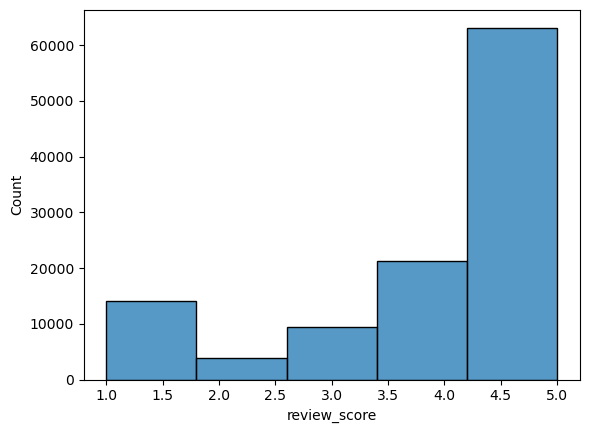

In [27]:
# Use a histogram to determine the distributions of different variables so categories can be created
sns.histplot(df['review_score'], bins = 5, kde = False)

<Axes: xlabel='freight_value', ylabel='Count'>

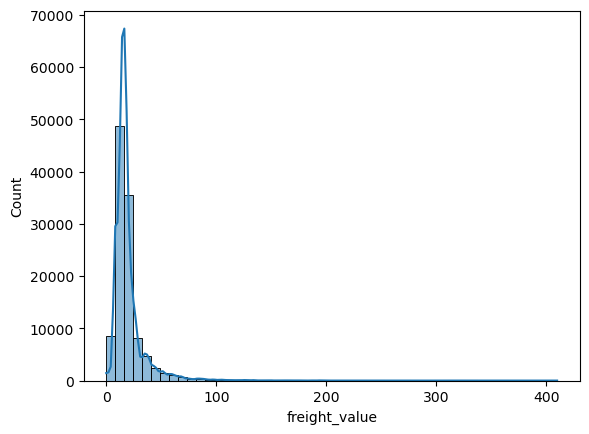

In [28]:
sns.histplot(df['freight_value'], bins = 50, kde = True)

<Axes: xlabel='shipping_days', ylabel='Count'>

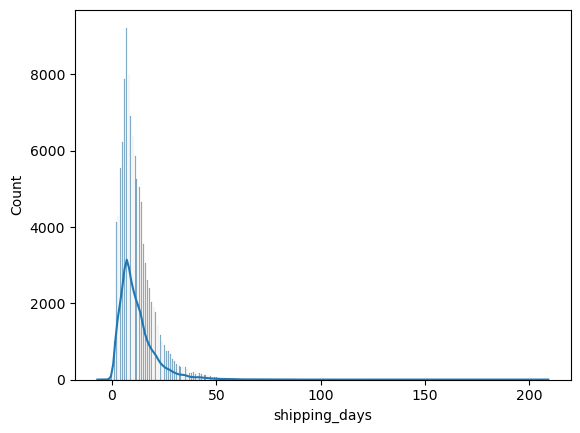

In [29]:
sns.histplot(df['shipping_days'], kde = True)

In [30]:
df['shipping_days'].describe()

count    110181.000000
mean         12.024569
std           9.416983
min          -7.000000
25%           6.000000
50%          10.000000
75%          15.000000
max         209.000000
Name: shipping_days, dtype: float64

In [31]:
df = df[df['shipping_days'] >0]

In [32]:
df2 = df[df['shipping_days'] >=15]
df3 = df[df['shipping_days'] <15]

In [33]:
df2['review_score'].describe()

count    29200.000000
mean         3.590479
std          1.569284
min          1.000000
25%          2.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [34]:
df3['review_score'].describe()

count    80003.000000
mean         4.261328
std          1.207397
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [35]:
df2['review_score'].value_counts()

review_score
5.0    12581
1.0     6122
4.0     5800
3.0     3221
2.0     1476
Name: count, dtype: int64

In [36]:
df3['review_score'].value_counts()

review_score
5.0    50275
4.0    15238
1.0     6346
3.0     5958
2.0     2186
Name: count, dtype: int64

In [37]:
df.loc[df['shipping_days'] <8, 'shipping_speed'] = 'Quick Shipping'

In [38]:
df.loc[(df['shipping_days'] >=8) & (df['shipping_days'] <13), 'shipping_speed'] = 'Average Shipping'

In [39]:
df.loc[df['shipping_days'] >=13, 'shipping_speed'] = 'Slow Shipping'

In [40]:
df['shipping_speed'].value_counts(dropna = False)

shipping_speed
Slow Shipping       39257
Quick Shipping      38316
Average Shipping    32454
Name: count, dtype: int64

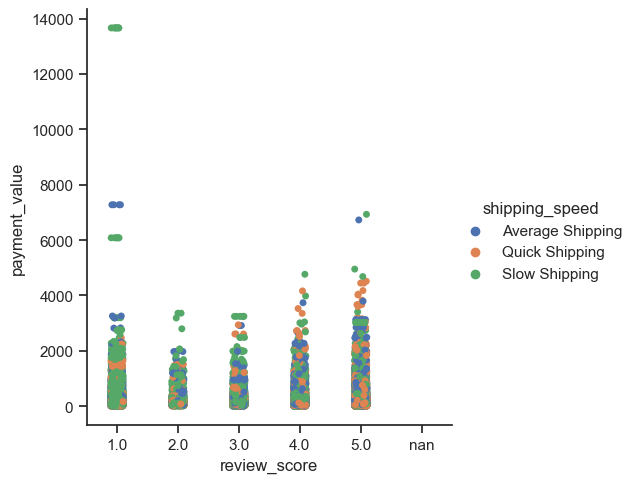

In [41]:
# Use shipping speed variable to create a categorical plot with seaborn
sns.set(style='ticks')
g = sns.catplot(x = 'review_score', y = 'payment_value', hue = 'shipping_speed', data = df)

In [42]:
g.figure.savefig(os.path.join(path, 'shipping_speed_catplot.png'))

#### Categorical Plot Analysis
After making the new shipping_speed variable, I compared the review_score and payment_value. The plot is very populated, however you can visually see a trend with review scores of 1 being mostly green, meaning slow shipping, and review scores of 5 being mostly orange, meaning quick shipping. I would like to take a subset of the payments and remove some of the high priced items to get a better spacing within the points so they are not overlapping and possibly misleading. 

#### Addtional Questions
1. Do certain states or areas have faster shipping speeds?
2. Is there a trend causing faster/slower shipping speeds?
3. Does the freight value effect the shipping speed?

#### Hypotheses
1. Quicker shipping speeds will result in a better review score rating.
2. The most popular items are getting good reviews and shipping quickly.

In [43]:
# Export data
df.to_pickle(os.path.join(path, 'e_commerce_cleaner.pkl'))